# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|------------- |-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following sessions, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [28]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [29]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
missing_columns = data.columns[data.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['Item_Weight', 'Outlet_Size']


['Item_Weight', 'Outlet_Size']


<Axes: >

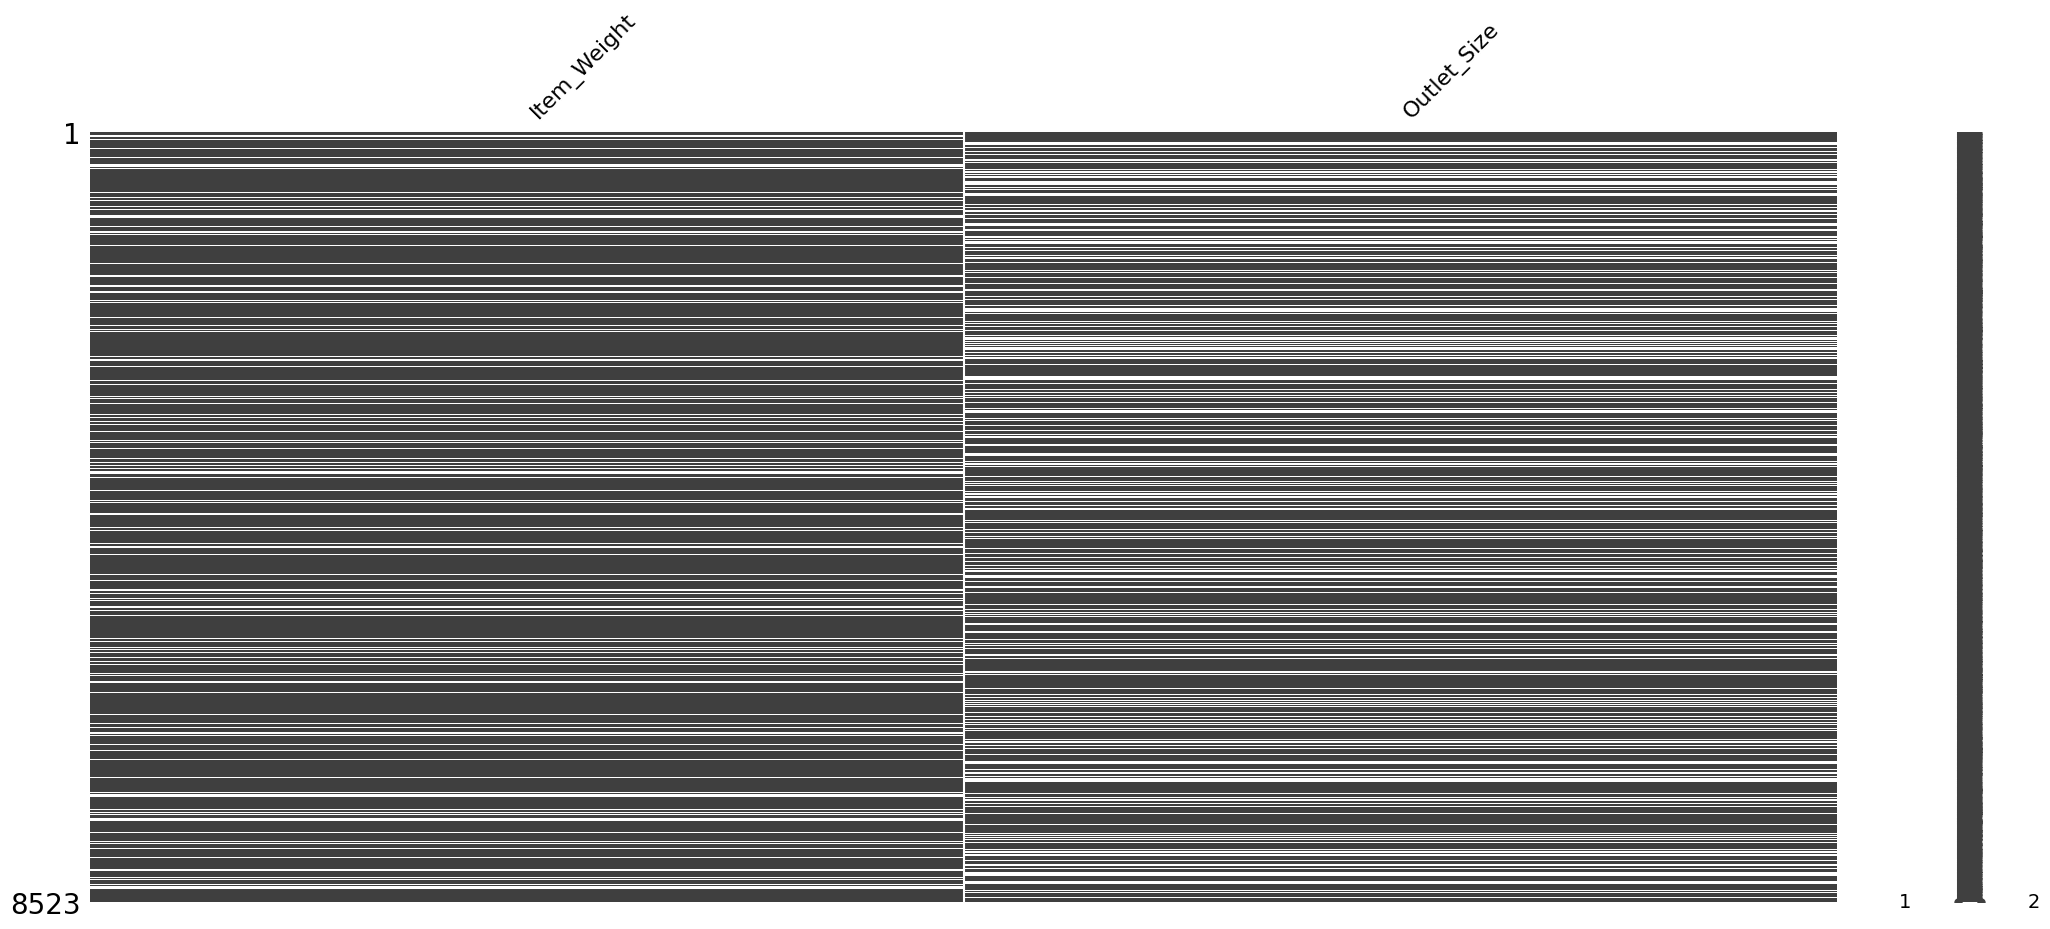

In [33]:
#Checking Missing Values Pattern in Dataframe
import missingno as mn

null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)
mn.matrix(data[null_cols])

In [34]:
data['Item_Weight'] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [35]:
data['Outlet_Size'] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [36]:
# Persentage of Missing Value:

missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print("Percentage of Missing Values \n", missing_percentage)

Percentage of Missing Values 
 Outlet_Size    28.276428
Item_Weight    17.165317
dtype: float64


**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [51]:
numeric_columns = data._get_numeric_data().columns.values.tolist()
numeric_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [38]:
# int, float and boolean data
print(data.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(data.count(numeric_only=True)))

Item_Weight                  7060
Item_Visibility              8523
Item_MRP                     8523
Outlet_Establishment_Year    8523
Item_Outlet_Sales            8523
dtype: int64
Total No. of Numerical Columns: 5


In [39]:
# Count the number of unique values in each nominal variable
unique_counts = data.select_dtypes(include=['object']).nunique()

unique_counts

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

**Task:** How many products are there, how many stores, item types?


In [40]:
# How many products:
products = data.groupby('Item_Identifier').size()
products

Item_Identifier
DRA12    6
DRA24    7
DRA59    8
DRB01    3
DRB13    5
        ..
NCZ30    7
NCZ41    5
NCZ42    5
NCZ53    5
NCZ54    7
Length: 1559, dtype: int64

In [41]:
# How many items:
items_types = data.groupby('Item_Type').size()
items_types

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
dtype: int64

In [42]:
# How many stores:
stores = data.groupby('Outlet_Type').size()
stores

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
dtype: int64

**Task:** Explore the numbers of each categorical variable.

In [43]:
data['Item_Identifier'].nunique()

1559

In [44]:
data.groupby('Item_Type')['Item_Identifier'].count()


Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Identifier, dtype: int64

In [45]:
fat_uniq = data['Item_Fat_Content'].unique()
fat_uniq

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [46]:
# Fill in missing values with the average ['Item_Weight']
data['Item_Weight'] = data['Item_Weight'].fillna(value=data['Item_Weight'].mean())
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
# Fill in missing values with mode ['Outlet_Size']
data['Outlet_Size'] = data['Outlet_Size'].fillna(value=data['Outlet_Size'].mode()[0])
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Task:** Check if there are no more missing values.

In [48]:
missing_values = data.isnull().sum()
missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

---------
### Exporting Data

**Task:** You can save the processed data to your local machine as a csv file. **We will use this dataset in the following sessions to create machine learning models.**

In [49]:
data.to_csv("processed_data_p1.csv", index=False)